# Bar Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pokemon = pd.read_csv("Data/pokemon.csv")
print(pokemon.shape)

pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## 1) Generation data as bar chart

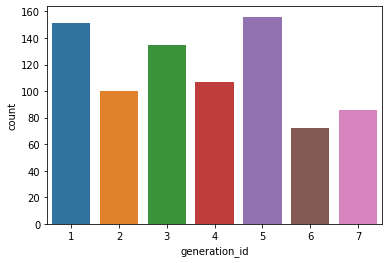

In [3]:
sns.countplot(data = pokemon, x = "generation_id");

### change base color

`color_palette` returns a list of RGB tuples, each tuple specifying a color. 

In [4]:
# get list of all the color of seaborn color palette
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
# get the first color from the list
base_color = sns.color_palette()[0]

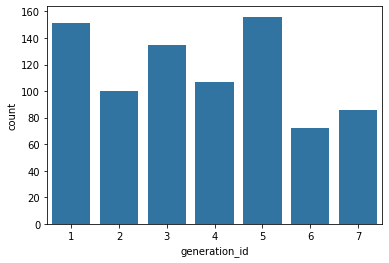

In [7]:
# set the base color to the plot
sns.countplot(data = pokemon, x = "generation_id", color = base_color);

### Sort by count of generation

In [8]:
#get the index of order by using panda series (by decending order)
pokemon["generation_id"].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [10]:
# we only need index
gen_order = pokemon["generation_id"].value_counts().index
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

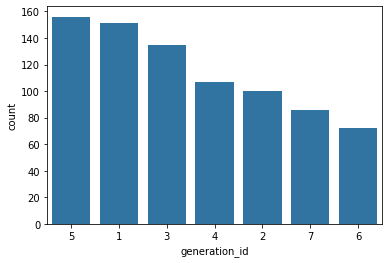

In [12]:
# use it in the plot for order
sns.countplot(data = pokemon, x = "generation_id", color = base_color, order = gen_order);

## 2) Pokemon Type Bar Chart

In [13]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


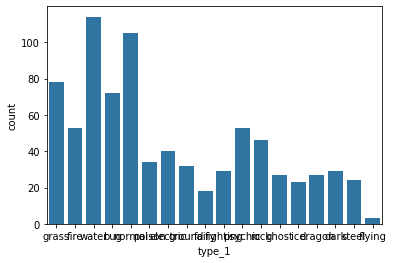

In [14]:
sns.countplot(data = pokemon, x = "type_1", color = base_color);

lables are overlapped. To fix this, we will need to rotate.

### 2.1) Approach using seaborn
- just change x to y

If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels. One way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter "y":



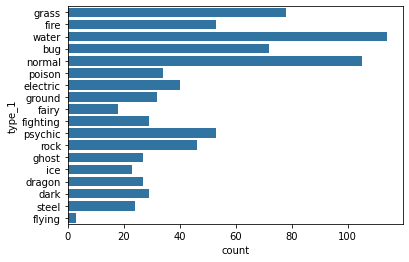

In [15]:
sns.countplot(data = pokemon, y = "type_1", color = base_color);

### 2.2) Alternative Approach : using matplotlib rotation on xticks

you can use matplotlib's xticks function and its "rotation" parameter to change the orientation in which the labels will be depicted (as degrees counter-clockwise from horizontal):

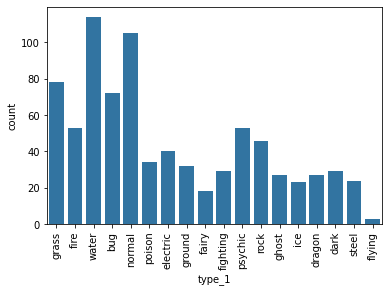

In [16]:
sns.countplot(data = pokemon, x = "type_1", color = base_color);
plt.xticks(rotation = 90);

## Order by type

In [19]:
type_order = pokemon["type_1"].value_counts().index
type_order

Index(['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'dragon', 'ghost',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

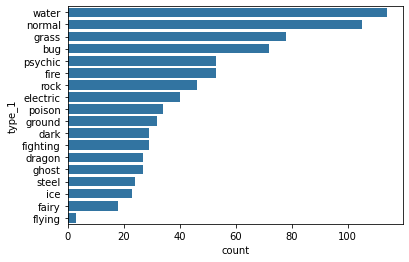

In [21]:
# finally order
sns.countplot(data = pokemon, y = "type_1", color = base_color, order = type_order);

As we can pokemon water type are the most common type and flying types are the least common ones.

------------------

## 3) Order by Type_2

In [47]:
base_color = sns.color_palette()[0]
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

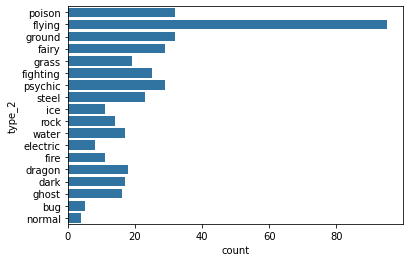

In [49]:
sns.countplot(data = pokemon, y = "type_2", color = base_color);

### want to order

In [52]:
type_order = pokemon["type_2"].value_counts().index
type_order

Index(['flying', 'poison', 'ground', 'psychic', 'fairy', 'fighting', 'steel',
       'grass', 'dragon', 'dark', 'water', 'ghost', 'rock', 'ice', 'fire',
       'electric', 'bug', 'normal'],
      dtype='object')

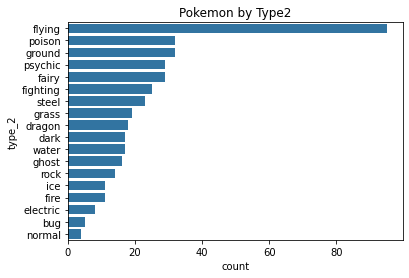

In [55]:
#final plot
sns.countplot(data = pokemon, y = "type_2", color = base_color, order = type_order);
plt.title ("Pokemon by Type2");

We can see that "Flying" type2 is the most common type.